## Rice Import Prediction Using Multiple Linear Regression

### Modelling 

In [1]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mengimpor dataset
data = pd.read_excel('DATA2 ver4.xlsx').set_index('year')
data

,Area harvested (ha),Production (tonnes),Kurs,Rataan harga beras di Indonesia (Rp/Kg),Stok Beras Indonesia (ton),import (tonnes),Konsumsi beras (ton),HBLN (Rp/kg),Proposi pekerja di sektor pertanian (%)
year,,,,,,,,,
1990,10502357.0,45178752.00,1843,438.300,2951000,49386.0,30203600,3873.425850,0.51000
1991,10281519.0,44688240.00,1950,435.920,2064000,170971.0,30008360,4194.197280,0.56000
1992,11103317.0,48240008.00,2023,568.700,3115000,615057.0,31749020,3835.814220,0.55000
1993,11012780.0,48181088.00,2087,639.720,2608000,23778.0,32174120,3366.598410,0.52000
1994,10733800.0,46641500.00,2160,727.360,1724000,638363.0,32250490,3826.804590,0.48000
1995,11438760.0,49744140.00,2249,936.120,4216000,3155965.0,35389010,4590.048960,0.44000
1996,11569729.0,51101504.00,2344,983.170,5051000,2147784.0,35153820,4846.322880,0.43000
1997,11140594.0,49377056.00,2909,1095.270,4063000,333904.0,34584650,4340.496510,0.43000
1998,11730200.0,49236700.00,10013,2249.360,6279000,2892137.0,35905450,4349.792160,0.45000


In [3]:
# Mengganti nama kolom supaya lebih sederhana
data.columns = ["Luas Lahan", "Produksi", "Kurs", "Rataan Harga Beras Lokal", "Stok Beras", 
                "Import", "Konsumsi", "Harga Beras Internasional", "Proporsi Petani"]

In [4]:
# Mendapatkan statistika deskriptif dari data
data.describe()

,Luas Lahan,Produksi,Kurs,Rataan Harga Beras Lokal,Stok Beras,Import,Konsumsi,Harga Beras Internasional,Proporsi Petani
count,3.100000e+01,3.100000e+01,31.000000,31.000000,3.100000e+01,3.100000e+01,3.100000e+01,31.000000,31.000000
mean,1.143537e+07,5.386325e+07,8463.806452,5211.674968,4.547516e+06,1.162781e+06,3.590062e+07,5039.382689,0.412043
std,4.195608e+05,4.879756e+06,4176.653656,4124.547760,1.596428e+06,1.095086e+06,2.577947e+06,1759.557052,0.073307
min,1.028152e+07,4.468824e+07,1843.000000,435.920000,1.724000e+06,2.377800e+04,3.000836e+07,2471.784840,0.283330
25%,1.133547e+07,5.010247e+07,5382.000000,1672.315000,3.333000e+06,3.642960e+05,3.503443e+07,3831.309405,0.355000
50%,1.152117e+07,5.415110e+07,9311.000000,3630.270000,4.216000e+06,6.899800e+05,3.646843e+07,4590.048960,0.430000
75%,1.173910e+07,5.903650e+07,10425.500000,9028.240000,5.814500e+06,1.713238e+06,3.800000e+07,5996.909835,0.450000
max,1.196320e+07,6.103100e+07,14582.000000,12326.454000,7.403000e+06,4.680762e+06,3.864744e+07,9298.367190,0.560000


In [5]:
# Cek Normalisasi pada Data
# Menggunakakn Shapiro Wilk Test dan aplha = 5%
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data follows Normal Distribution")
else:
    print("Data does not follow Normal Distribution")

stat=0.673, p=0.000
Data does not follow Normal Distribution


In [6]:
# Data akan dinormalisasi menggunakan Z Score Method
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
for i in data.columns : 
    data[i] = ss.fit_transform(data[[i]])

In [7]:
# Hasil data yang sudah dinormalisasi
data

,Luas Lahan,Produksi,Kurs,Rataan Harga Beras Lokal,Stok Beras,Import,Konsumsi,Harga Beras Internasional,Proporsi Petani
year,,,,,,,,,
1990,-2.260543,-1.809118,-1.611397,-1.176439,-1.016586,-1.033525,-2.246437,-0.673596,1.358353
1991,-2.795599,-1.911299,-1.585355,-1.177026,-1.581386,-0.920662,-2.323423,-0.488280,2.051695
1992,-0.804511,-1.171410,-1.567588,-1.144301,-0.912159,-0.508433,-1.637050,-0.695325,1.913026
1993,-1.023868,-1.183684,-1.552012,-1.126797,-1.234993,-1.057296,-1.469426,-0.966400,1.497022
1994,-1.699793,-1.504405,-1.534245,-1.105198,-1.797882,-0.486799,-1.439312,-0.700530,0.942349
1995,0.008214,-0.858076,-1.512584,-1.053747,-0.211094,1.850203,-0.201738,-0.259589,0.387676
1996,0.325532,-0.575316,-1.489462,-1.042151,0.320595,0.914344,-0.294477,-0.111534,0.249008
1997,-0.714195,-0.934545,-1.351950,-1.014523,-0.308517,-0.769417,-0.518911,-0.403760,0.249008
1998,0.714328,-0.963784,0.377049,-0.730088,1.102528,1.605301,0.001904,-0.398390,0.526344


In [8]:
# Cek normalisasi pada data yang sudah di transform menggunakan StandardScaler
# Using Shapiro Wilk Test & aplha = 5%
from scipy.stats import shapiro
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print("Data follows Normal Distribution")
else:
    print("Data does not follow Normal Distribution")

stat=0.994, p=0.318
Data follows Normal Distribution


In [9]:
# Define Target & Prediktor Variable
X = data.drop(['Import'], axis = 1)
y = data.loc[:,'Import']

In [10]:
# Isi variabel X
X

,Luas Lahan,Produksi,Kurs,Rataan Harga Beras Lokal,Stok Beras,Konsumsi,Harga Beras Internasional,Proporsi Petani
year,,,,,,,,
1990,-2.260543,-1.809118,-1.611397,-1.176439,-1.016586,-2.246437,-0.673596,1.358353
1991,-2.795599,-1.911299,-1.585355,-1.177026,-1.581386,-2.323423,-0.488280,2.051695
1992,-0.804511,-1.171410,-1.567588,-1.144301,-0.912159,-1.637050,-0.695325,1.913026
1993,-1.023868,-1.183684,-1.552012,-1.126797,-1.234993,-1.469426,-0.966400,1.497022
1994,-1.699793,-1.504405,-1.534245,-1.105198,-1.797882,-1.439312,-0.700530,0.942349
1995,0.008214,-0.858076,-1.512584,-1.053747,-0.211094,-0.201738,-0.259589,0.387676
1996,0.325532,-0.575316,-1.489462,-1.042151,0.320595,-0.294477,-0.111534,0.249008
1997,-0.714195,-0.934545,-1.351950,-1.014523,-0.308517,-0.518911,-0.403760,0.249008
1998,0.714328,-0.963784,0.377049,-0.730088,1.102528,0.001904,-0.398390,0.526344


In [11]:
# Isi Variabel y
y

year
1990   -1.033525
1991   -0.920662
1992   -0.508433
1993   -1.057296
1994   -0.486799
1995    1.850203
1996    0.914344
1997   -0.769417
1998    1.605301
1999    3.265619
2000    0.165233
2001   -0.478906
2002    0.600777
2003    0.421164
2004   -0.712994
2005   -0.902197
2006   -0.656015
2007    0.224807
2008   -0.807955
2009   -0.843383
2010   -0.438884
2011    1.474497
2012    0.615471
2013   -0.639875
2014   -0.294920
2015   -0.278722
2016    0.113051
2017   -0.803601
2018    1.012917
2019   -0.641629
2020    0.011830
Name: Import, dtype: float64

<Figure size 640x480 with 0 Axes>

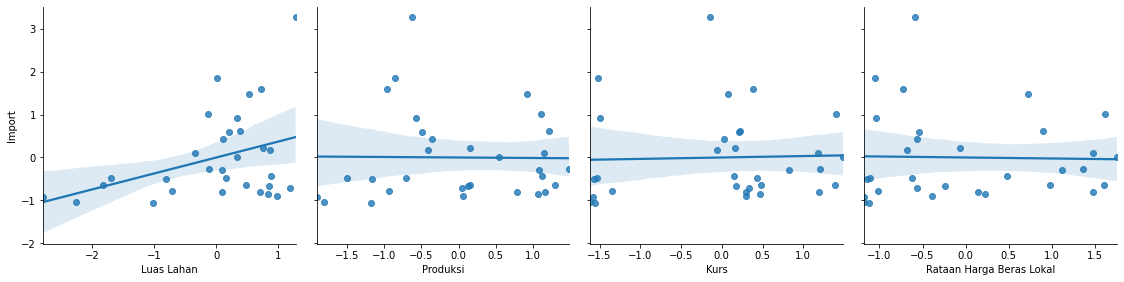

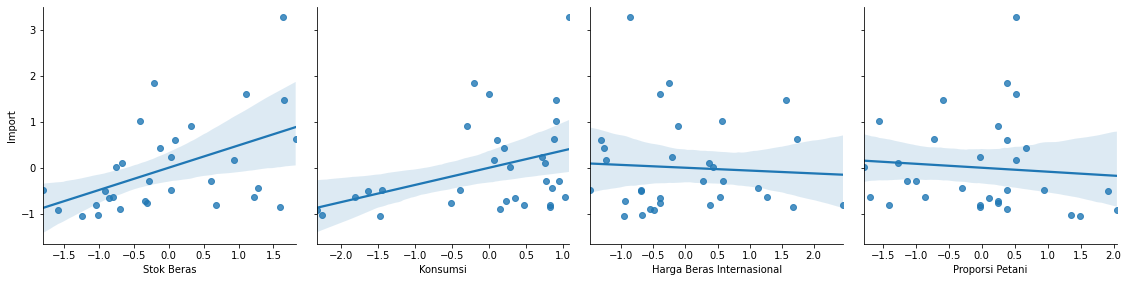

In [12]:
# Selanjutnya melihat korelasi antara variabel dependen dengan masing-masing variabel independen
# Terlihat variabel luas lahan, stok beras, dan konsumsi memiliki hubungan linear dengan import (variabel dependen)

from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

g = sns.PairGrid(data, y_vars='Import', x_vars=list(X.iloc[:,0:4].columns.values), height=4)
g.map(sns.regplot)

g = sns.PairGrid(data, y_vars='Import', x_vars=list(X.iloc[:,4:9].columns.values), height=4)
g.map(sns.regplot)
plt.show()

In [13]:
# Membuat model multiple regresi linear 
import statsmodels.api as sm
X_new = sm.add_constant(X)
X_new

X_opt = X_new.iloc[:, [0, 1, 2, 3, 4, 5,6,7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Import   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     7.132
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           0.000117
Time:                        22:19:43   Log-Likelihood:                -24.160
No. Observations:                  31   AIC:                             66.32
Df Residuals:                      22   BIC:                             79.23
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.388e-16      0.112   1.23e-15      1.000      -0.233       0.233
Luas Lahan                    0.2023      0.335      0.603      0.553      -0.493       0.898
Produksi                     -2.1858      0.480     -4.552      0.000      -3.181      -1.190
Kurs                         -0.6234      0.344     -1.813      0.084      -1.337       0.090
Rataan Harga Beras Lokal      1.6155      0.671      2.408      0.025       0.224       3.007
Stok Beras                    0.4890      0.189      2.592      0.017       0.098       0.880
Konsumsi                      1.1367      0.372      3.056      0.006       0.365       1.908
Harga Beras Internasional    -0.1094      0.237     -0.462      0.648      -0.600       0.382
Proporsi Petani              -0.1176      0.372     -0.317      0.755      -0.888       0.653
==============================================================================
Omnibus:                        0.380   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.540
Skew:                          -0.169   Prob(JB):                        0.763
Kurtosis:                       2.448   Cond. No.                         16.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Dari hasil model diatas, dengan menggunakan alpha = 10% diketahui bahwa variabel yang berpengaruh signifikan 
# terhadap import beras di Indonesia adalah produksi, kurs, harga beras lokal, stok beras, dan konsumsi

In [15]:
# Membuat model multiple regresi linear lanjutan
# Dengan menggunakan variabel produksi, kurs, harga beras lokal, stok beras, dan konsumsi
import statsmodels.api as sm
X_new = sm.add_constant(X)
X_new

X_opt = X_new.iloc[:, [0, 2, 3, 4, 5,6]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Import   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     12.32
Date:                Mon, 04 Oct 2021   Prob (F-statistic):           4.31e-06
Time:                        22:19:43   Log-Likelihood:                -24.725
No. Observations:                  31   AIC:                             61.45
Df Residuals:                      25   BIC:                             70.05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.388e-16      0.107   1.29e-15      1.000      -0.221       0.221
Produksi                    -2.2561      0.370     -6.095      0.000      -3.018      -1.494
Kurs                        -0.4419      0.238     -1.860      0.075      -0.931       0.047
Rataan Harga Beras Lokal     1.4770      0.342      4.324      0.000       0.773       2.181
Stok Beras                   0.4604      0.151      3.059      0.005       0.150       0.770
Konsumsi                     1.3652      0.254      5.372      0.000       0.842       1.889
==============================================================================
Omnibus:                        0.183   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.913   Jarque-Bera (JB):                0.394
Skew:                           0.032   Prob(JB):                        0.821
Kurtosis:                       2.452   Cond. No.                         9.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking Assumptions - Linear Regression

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [17]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.7217274814826562


#### 1. Mean of Residuals

In [18]:
# Mean of Residuals
residuals = y.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

# mean of residual bernilai baik karena mendekati 0

Mean of Residuals -7.162729191130042e-17


#### 2. Check for Homoscedasticity

In [19]:
# Check for Homoscedasticity
# Null Hypothesis: Error terms are homoscedastic
# Alternative Hypothesis: Error terms are heteroscedastic.
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

# karena p value > alpha = 5% maka H0 diterima
# Error terms are homoscedastic

[('F statistic', 1.250669398789277), ('p-value', 0.3773090936577994)]

C:\Users\libra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\libra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


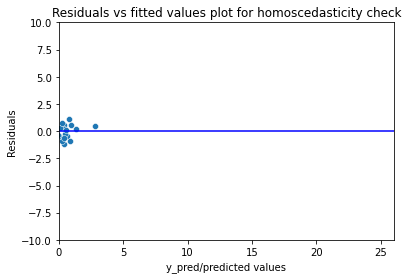

In [20]:
# Plot Homoscedasticity
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

#### 3. Check for Normality of residuals

C:\Users\libra\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


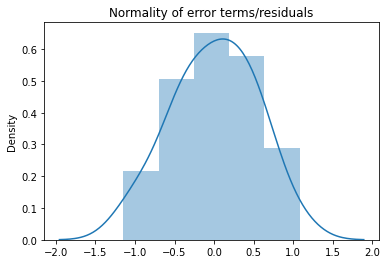

In [21]:
# Check for Normality of residuals
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

# Terlihat dari grafik bahwa residual bersifat normal

#### 4. Checking for Autocorelation

In [22]:
# Checking for Autocorelation
# Null Hypothesis: Autocorrelation is absent.
# Alternative Hypothesis: Autocorrelation is present
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 30)[1])

# karena p value < alpha = 5% maka H0 ditolak
# terdapat autocorelation

C:\Users\libra\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


3.728980748988716e-10

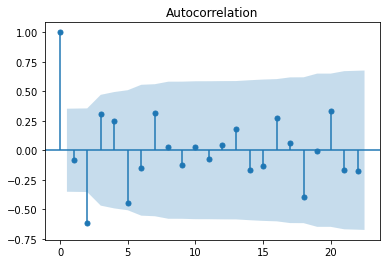

In [23]:
# Autocorrelation Plot
sm.graphics.tsa.plot_acf(residuals, lags=22)
plt.show()

# autocorelation ditunjukan dari garis yang berada diluar area biru

#### 5. Checking Multicolinearity

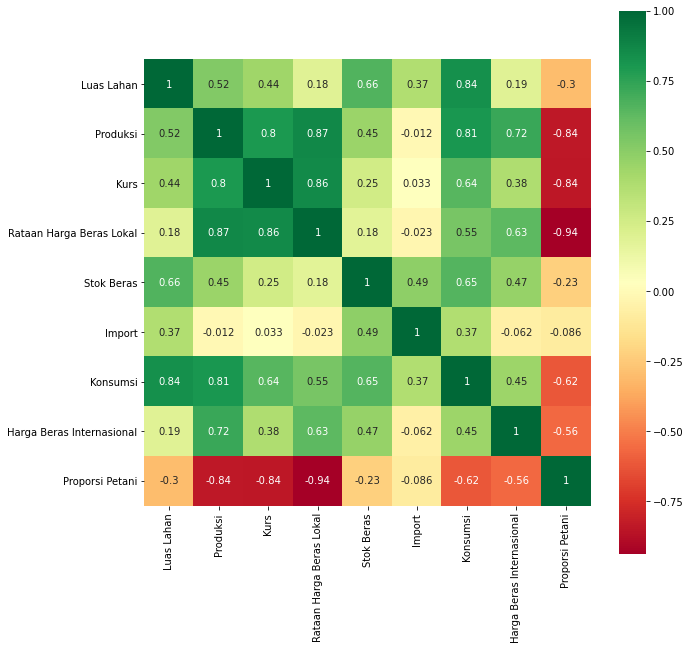

In [24]:
# Checking Multicolinearity
plt.figure(figsize=(10,10))  
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True)

# terdapat multicolinearity pada beberapa variabel 